In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy.spatial.distance as dist
import itertools
import math
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:44:39.416254. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [4]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:44:39.417480. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [6]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
#'27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat',
                 '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat',
                 '27-Feb_17_33_59_out.mat', '28-Feb_16_21_21_out.mat', '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', 
                  '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:08.266985. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/p30771/dlc_analysis/openfield_dlc_output/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in ko_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:08.882779. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [8]:
#tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:10.065180. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [9]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in wt_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:17.525160. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [10]:
CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:18.242666. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_32_15_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_13_27_27_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_33_59_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_21_21_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_14_22_02_

In [11]:
tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:19.299321. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H15_M39_S40/GRIN038_H15_M39_S40_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H11_M57_S0/GRIN038_H11_M57_S0_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H13_M37_S23/GRIN038_H13_M37_S23_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN041_H12_M54_S49/GRIN041_H12_M54_S49_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN009_H13_M59_S14/GRIN009_H13_M59_S14_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN018_H17_M41_S43/GRIN018_H17_M41_S43_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN018_H16_M13_S53/GRIN018_H16_M13_S53_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN011_H10_M19_S5

In [12]:
binning_time = 1 # seconds 
body_part_for_tracking = 'tail_base' #

grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list, tracking_files):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)
        # create tracking time deltas
        interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)
        #C_z_scored_filtered = utils_jjm.filter_out_by_size(C_z_scored, cell_contours, for_dims, 0.6, 100)
        #store results 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_z_scored': C_z_scored, 'C_normalized': C_normalized, 'C_normalized_z_scored': C_normalized_z_scored, 
                                                          'interpolated' : interpolated, 'com' : com_df, 'spatial_components' : spatial_components, 'cell_contours': cell_contours,  
                                                         'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:45:31.368756. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H15_M39_S40/GRIN038_H15_M39_S40_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H11_M57_S0/GRIN038_H11_M57_S0_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN038_H13_M37_S23/GRIN038_H13_M37_S23_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN041_H12_M54_S49/GRIN041_H12_M54_S49_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat
/

## triggered averaging 

In [13]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['interpolated'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=50)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:12.145697. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [14]:
#V_df.index

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:13.684210. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [15]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_norm_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(filtered_for_analysis.keys()))

# after downsampling convert back to regular index, timedelta is behaving oddly 
C_norm_df_reindexed = pd.concat([C_norm_df.loc[session].reset_index(drop=True)
                  for session in list(set(C_norm_df.index.get_level_values(level=0)))], keys=list(set(C_norm_df.index.get_level_values(level=0))))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:14.619089. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [16]:
# do same for velocity dataframe
V_df_reindexed = pd.concat([V_df.loc[session].reset_index(drop=True)
                            for session in list(set(V_df.index.get_level_values(level=0)))], keys=list(set(V_df.index.get_level_values(level=0)))) 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:15.911158. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [17]:
V_df_reindexed.head()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:17.006703. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


index  miniscope_light  tail_base  ear_left  \
GRIN041_H12_M54_S49 0  10.1525         3.038805   3.305803  2.146841   
                    1  12.8225         3.206093   3.156120  2.210678   
                    2  15.4925         3.373382   3.006437  2.274514   
                    3  18.1625         3.540670   2.856753  2.338350   
                    4  20.8325         3.707959   2.707070  2.402187   

                       centroid  ear_right  miniscope_light_likelihood  \
GRIN041_H12_M54_S49 0  2.698457   4.577517                    0.028674   
                    1  2.678553   4.392772                    0.025974   
                    2  2.658649   4.208027                    0.023274   
                    3  2.638745   4.023282                    0.020574   
                    4  2.618841   3.838537                    0.017874   

                       tail_base_likelihood  ear_left_likelihood  \
GRIN041_H12_M54_S49 0              0.999999             0.266665   
                    1              0.999999             0.261117   
                    2              0.999999             0.255570   
                    3              1.000000             0.250022   
                    4              1.000000             0.244475   

                       centroid_likelihood  ear_right_likelihood  msCam_index  \
GRIN041_H12_M54_S49 0             0.368653              0.185460          3.0   
                    1             0.373468              0.212967          7.0   
                    2             0.378283              0.240474         11.0   
                    3             0.383098              0.267980         15.0   
                    4             0.387912              0.295487         19.0   

                          velocity_bins  
GRIN041_H12_M54_S49 0    (2.817, 5.569]  
                    1    (2.817, 5.569]  
                    2    (2.817, 5.569]  
                    3    (2.817, 5.569]  
                    4  (-0.0724, 2.817]

In [18]:
#bin by activity threshold (body_part, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold)
binned_velocity_df = pd.DataFrame([dlc_utils.bin_by_activity_threshold(V_df.loc[session]['tail_base'], 80, 20, 1, 2, 3)
                                for session in list(grouped_raw_data.keys())], index=list(grouped_raw_data.keys()))
binned_velocity_df = binned_velocity_df.transpose()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:23.744709. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
#need to make sure x axis from velocity binned df matches axis from grouped raw data 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:28.005224. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [20]:
binned_velocity_df.head()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:46:28.563017. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,GRIN038_H15_M39_S40,GRIN038_H13_M37_S23,GRIN041_H12_M54_S49,GRIN009_H13_M59_S14,GRIN018_H17_M41_S43,GRIN018_H16_M13_S53,GRIN011_H10_M19_S59,GRIN012_H17_M32_S17,GRIN012_H16_M57_S23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
regions_by_session = {}
to_concat = []
for session in list(grouped_raw_data.keys()):
    # gets indicies where animal crosses a velocity threshold
    crossing_indicies = [sample for sample in utils_jjm.select_trigger_regions(binned_velocity_df[session], 0.5, 0.5, 20) if sample<len(C_norm_df_reindexed.loc[session])]
    # for each cell average the basseline ~10 seconds before crossing the velocity threshold    
    if len(crossing_indicies)>0:
        print(session)
        movement_regions_in_recording = {}
        # only include samples that are within range of miniscope data
        for sample in crossing_indicies:
            raw_data_to_baseline = C_norm_df_reindexed.loc[session].dropna(axis=1).drop(['msCamFrame'], axis=1)

            # so say baseline is 80 samples to 20 samples before threshold
            baseline_region = raw_data_to_baseline[sample-80:sample-20].reset_index(drop=True)
            movement_region = raw_data_to_baseline[sample-80:sample+80].reset_index(drop=True)

            baseline_region_std_dev = baseline_region.std(axis=0)
            baseline_region_mean = baseline_region.mean(axis=0)

            movement_region_z_scored = pd.DataFrame((movement_region-baseline_region_mean.values)/baseline_region_std_dev)
    
            movement_regions_in_recording[sample] = movement_region_z_scored
        regions_by_session[session] = pd.concat(movement_regions_in_recording, axis=1, keys=crossing_indicies)
        to_concat.append(session)
    
z_scored_regions_by_session = pd.concat(list(regions_by_session.values()), axis=1, keys=to_concat)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:47:34.310127. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


GRIN038_H15_M39_S40
GRIN038_H13_M37_S23
GRIN041_H12_M54_S49
GRIN009_H13_M59_S14
GRIN018_H17_M41_S43
GRIN011_H10_M19_S59
GRIN012_H17_M32_S17
GRIN012_H16_M57_S23


In [52]:
session = to_concat[0]
session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = np.array([sample_idx for sample_idx in session_df.columns.levels[0] if sample_idx in session_df.columns])
print('session:', session)
print('threshold crossing indicies:' , sample_crossing_indicies)
print('cell indicies:' , list(set(z_scored_regions_by_session[session].columns.get_level_values(1))))

session: GRIN038_H15_M39_S40
threshold crossing indicies: [ 311  631 1756 1927 2820 3771 4356 7920]
cell indicies: [1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 32, 34, 38, 39, 40, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 74, 75, 77, 78, 80, 81, 82, 86, 87, 89, 92]


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 22:01:22.054903. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 22:02:34.869331. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


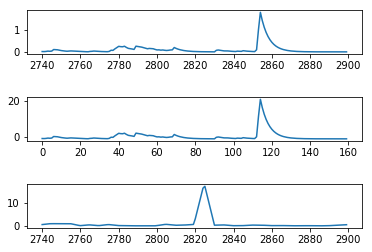

RMS noise: 2.8815048855597576
Peak: 20.9461821584105
Peak/RMS: 7.269181552798763


In [57]:
##plot individual cell activity
#raw "pre z score" region
#zscores
#velocity
sample = sample_crossing_indicies[0]
cell = 2
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(C_norm_df_reindexed.loc[session][cell][sample-80:sample+80]) 
ax2.plot(z_scored_regions_by_session[session][sample][cell])
ax3.plot(V_df_reindexed.loc[session]['tail_base'][sample-80:sample+80]) 
plt.subplots_adjust(hspace=1)
plt.show()

#display rms noise for trace 
rms = np.sqrt(np.mean(np.square(z_scored_regions_by_session[session][sample][cell])))
peak = np.max(z_scored_regions_by_session[session][sample][cell])
print('RMS noise:', rms)
print('Peak:', peak)
print('Peak/RMS:', peak/rms)

In [51]:
# calculate the peak to rms ratio for each threshold event, each cell, and across all cells and events, and sessions  

peak_rms = lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence)))

session = to_concat[0]
print('session:', session)
session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = np.array([sample_idx for sample_idx in session_df.columns.levels[0] if sample_idx in session_df.columns])
print('threshold crossing indicies:' , sample_crossing_indicies)
print('cell indicies:' , list(set(z_scored_regions_by_session[session].columns.get_level_values(1))))
event = sample_crossing_indicies[0]
cell = list(set(z_scored_regions_by_session[session].columns.get_level_values(1)))[0]


peak_rms_ratio_cell = z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio_event = z_scored_regions_by_session[session][event].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio = z_scored_regions_by_session[session].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio_all_sessions = pd.concat([z_scored_regions_by_session[session].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
                                        for session in list(set(z_scored_regions_by_session.columns.get_level_values(0)))], axis=0, keys=list(set(z_scored_regions_by_session.columns.get_level_values(0))))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:56:47.236712. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


session: GRIN038_H15_M39_S40
threshold crossing indicies: [ 311  631 1756 1927 2820 3771 4356 7920]
cell indicies: [1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 32, 34, 38, 39, 40, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 74, 75, 77, 78, 80, 81, 82, 86, 87, 89, 92]


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:49:20.248086. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


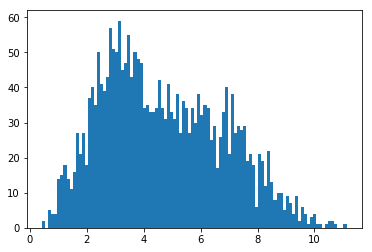

In [26]:
#histogram of all peak to rms ratios across sample events
plt.hist(peak_rms_ratio_all_sessions, 100)
plt.show()

In [27]:
# plot average activity of a cell across all movement events 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:49:48.902218. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [58]:
# plots the activity of a cell across all movement threshold crossings in a given session
session = 'GRIN038_H15_M39_S40'
sample_crossing_indicies = list(set(z_scored_regions_by_session[session].columns.get_level_values(0)))
print('session:', session)
cell = 2
#z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell].head()

session: GRIN038_H15_M39_S40


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 22:02:47.097345. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 22:02:47.636335. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


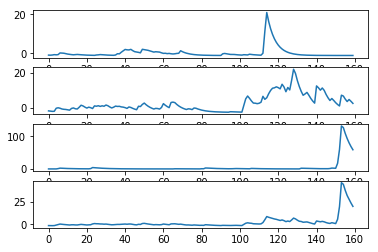

In [59]:
# plot a few example traces
events_to_plot = [0, 1, 2]
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4)
ax1.plot(z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[0]]])
ax2.plot(z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[1]]])
ax3.plot(z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[2]]])
ax4.plot(pd.concat([z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[0]]],
                   z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[1]]],
                  z_scored_regions_by_session[session].iloc[:, z_scored_regions_by_session[session].columns.get_level_values(1)==cell][sample_crossing_indicies[events_to_plot[2]]]], axis=1).mean(axis=1))

In [30]:
## plot heatmap with different peak/RMS thresholds
# need to average cells within sessions

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:17.938748. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:19.369383. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


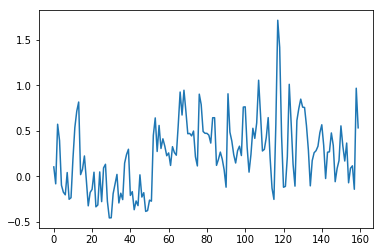

In [31]:
#plt.plot(cell_means_by_session[cell])
means_by_cell_by_session = pd.concat([z_scored_regions_by_session[session].groupby(level=[1], axis=1).mean() for session in list(set(z_scored_regions_by_session.columns.get_level_values(0)))], axis=1, 
                                     keys=list(set(z_scored_regions_by_session.columns.get_level_values(0))))
plt.plot(means_by_cell_by_session[session][cell])

In [32]:
#drop columns with infinity values (from start and end of session?)
inf_cells_to_exclude = means_by_cell_by_session.columns.to_series()[np.isinf(means_by_cell_by_session).any()].index
means_by_cell_by_session.drop(inf_cells_to_exclude, axis=1, inplace=True)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:41.834474. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [33]:
#means_by_cell_by_session

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:45.366580. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:45.936813. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


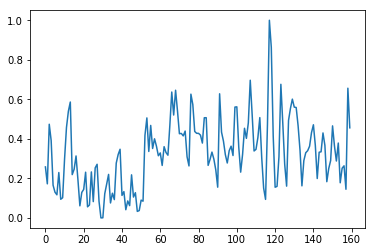

In [34]:
# range scale data
scaler = MinMaxScaler()
activity_scaled = pd.DataFrame(scaler.fit_transform(means_by_cell_by_session), columns=means_by_cell_by_session.columns)
#e.g. traces 
plt.plot(activity_scaled[session][cell])

In [35]:
# sort events by latency from threshold crossing
def sort_array_by_latency(unsorted_dataframe):
    latency = unsorted_dataframe.idxmax(axis=0)
    latency_flat = latency.reset_index()
    latency_sorted = latency_flat.sort_values(by=0)
    sorted_by_peak_latency = np.empty([unsorted_dataframe.shape[1], unsorted_dataframe.shape[0]])
    for row_idx in range(len(list(latency_sorted.index))):
        sorted_by_peak_latency[row_idx] = unsorted_dataframe[latency_sorted.loc[list(latency_sorted.index)[row_idx]]['level_0']][latency_sorted.loc[list(latency_sorted.index)[row_idx]]['level_1']]
    return(sorted_by_peak_latency)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:48.126372. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [36]:
# heatmap with all cells
all_cells_heatmap = sort_array_by_latency(activity_scaled)
# filter out cells based on peak/noise ratio
peak_rms_ratio_by_cell_by_session = pd.concat([peak_rms_ratio_all_sessions[session].groupby(level=[1], axis=0).mean() for session in list(set(peak_rms_ratio_all_sessions.index.get_level_values(0)))], axis=0, 
                                     keys=list(set(peak_rms_ratio_all_sessions.index.get_level_values(0))))

#remove cells already excluded for infinity values 
peak_rms_ratio_by_cell_by_session.drop(inf_cells_to_exclude, axis=0, inplace=True)
filtered_by_peak = activity_scaled[peak_rms_ratio_by_cell_by_session.loc[peak_rms_ratio_by_cell_by_session>4].index]
filtered_by_peak_heatmap = sort_array_by_latency(filtered_by_peak)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:49.069636. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-09 21:50:52.974667. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


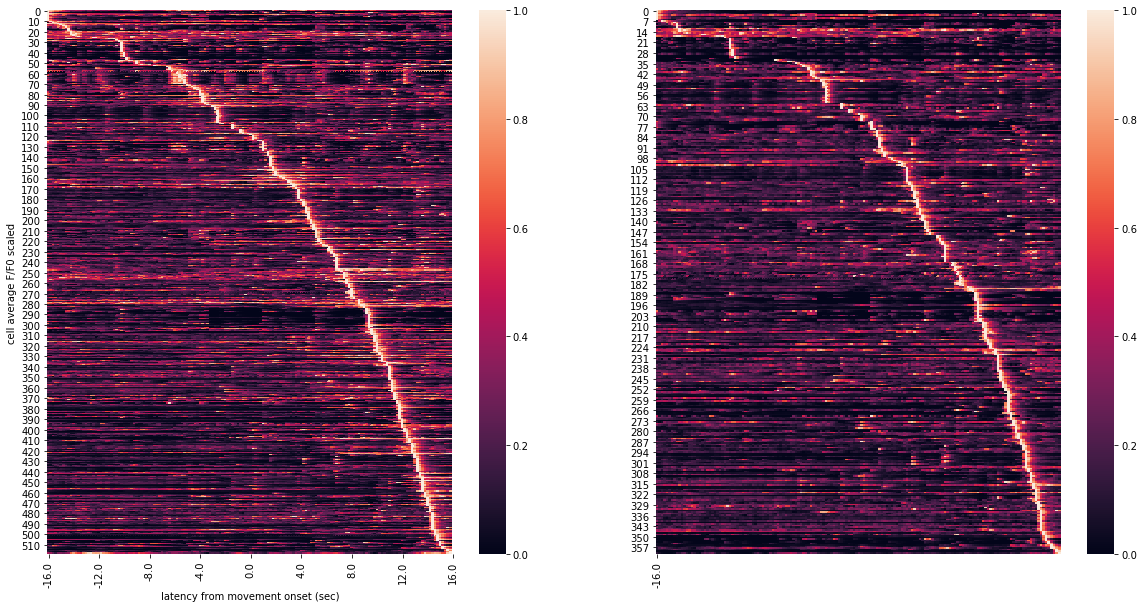

In [37]:
X_labels = np.linspace(-16, 16, 161)
fig = plt.figure()
fig.set_size_inches(20, 10)
p1 = fig.add_subplot(1,2,1)
ax = sns.heatmap(all_cells_heatmap, xticklabels=X_labels)
ax.set_xticks(ax.get_xticks()[::20])
ax.set_xticklabels(X_labels[::20])
p2 = fig.add_subplot(1,2,2)
ax2 = sns.heatmap(filtered_by_peak_heatmap, xticklabels=X_labels)
ax2.set_xticks(ax.get_xticks()[::20])
ax2.set_xticklabels(X_labels[::20])
ax.set_ylabel('cell average F/F0 scaled')
ax.set_xlabel('latency from movement onset (sec)')
plt.show()

In [ ]:
## concat by mouse for triggered average plots
concacted_by_mouse = {}
for mouse in [name[0:7] for name in list(set(z_scored_regions_by_session.columns.levels[0]))]:
    dfs_by_mouse = []
    sessions = []
    for session in list(z_scored_regions_by_session.columns.levels[0]):
        if mouse in session:
            if not(z_scored_regions_by_session[session].empty):
                #means = z_scored_regions_by_session[session].mean(axis=1, level=0)
                dfs_by_mouse.append(z_scored_regions_by_session[session])
                sessions.append(session)
    if len(dfs_by_mouse)>0:
        concacted_by_mouse[mouse] = pd.concat(dfs_by_mouse, axis=1, keys=sessions)
combined_by_mouse = pd.concat(list(concacted_by_mouse.values()), axis=1, keys=list(concacted_by_mouse.keys()))

In [ ]:
# maybe should do min, max scaler here
plt.plot(combined_by_mouse.mean(axis=1))

In [ ]:
# create range scaled data to compare across cells
scaler = MinMaxScaler()
activity_scaled = pd.DataFrame(scaler.fit_transform(combined_by_mouse), columns=combined_by_mouse.columns)
activity_scaled_cell_means = activity_scaled.groupby(level=[0,1], axis=1).mean()

In [ ]:
plt.plot(activity_scaled.mean(axis=1))

In [ ]:
combined_by_mouse_timedelta = combined_by_mouse.set_index(pd.to_timedelta(np.linspace(0, (len(combined_by_mouse)-1)*(1/5), len(combined_by_mouse)), unit='s'), drop=True)

In [ ]:
#resampled_for_plotting.head()

In [ ]:
plt.rcParams.update({'font.size': 22})
df_to_plot = resampled_for_plotting
activity_measure = 'spatial_coordination'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
scale_f = 0.0868
mean=df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f
plt.plot(x, df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f, color='k')
std_error = ((df_to_plot.std(axis=1, level=2)['velocity'])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]))*scale_f
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('velocity cm/sec')
ax.set_xlabel('time (seconds)')
ax.axvline(x=(0), linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('/home/jma819/presentation_files/wt_velocity_spatial_coord_triggered.svg', transparent=True)
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/v_triggered.pdf', transparent=True)
plt.show()

In [ ]:
activity_measure = 'fluorescence'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
mean = df_to_plot.mean(axis=1, level=2)[activity_measure].values
plt.plot(x, mean, color='k')
std_error = (df_to_plot.std(axis=1, level=2)[activity_measure])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]*1)
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('dF/F z-score')
ax.set_xlabel('time (seconds)')
ax.axvline(x=0, linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('.svg')
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/wt_fluorescence_triggered.pdf', transparent=True)
plt.show()

## event ISIs 

In [ ]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))

In [ ]:
C_df = C_df.drop(['msCamFrame'], axis=1)

In [ ]:
ISIs_by_session = []
for session in list(grouped_raw_data.keys()):
    print(session)
    event_indicies, event_times, event_ISIs = utils_jjm.get_ISIs(C_df.loc[session].dropna(axis=1), 20, .1, np.array(C_df.loc[session].dropna(axis=1).columns), 2)
    ISIs_by_session.append(event_ISIs)